# Directing Customer to Subscription Through Financial App Behaviour Analysis

# Goal of the project

The 'FinTech' company launch there android and iOS mobile base app and want to
grow there business. But there is problem how to recomended this app and offer
who really want to use it. So for that company decided to give free trial to 
each customer for 24 hour and collect data from the customers.
In this scenario some customer purchase the app and someone not. According to this data company want to give special offer to the customer who are not interested to buy without offer and grow their business.

In [135]:
# import essential libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser # convert time in date time data type

In [136]:
fineTech_appData = pd.read_csv('FineTech_appData.csv')
fineTech_appData.shape

(50000, 12)

In [137]:
fineTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [138]:
fineTech_appData.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [139]:
for i in range(6):
    print(fineTech_appData.loc[i, 'screen_list'],'\n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [140]:
fineTech_appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [141]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [142]:
fineTech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
# Get the unique value of each columns and it's length
features = fineTech_appData.columns
for i in features:
    print('''unique value of {}\n{}\nlen is {}\n...........\n
    '''.format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())))

unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874
...........

    
unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747
...........

    
unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7
...........

    
unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24
...........

    
unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77

In [144]:
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [145]:
# hour data convert string to int 
fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1,3).astype(int)

In [146]:
# get data type of each columns
fineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [147]:
fineTech_appData.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [148]:
# drop object dtype columns
fineTech_appData2 = fineTech_appData.drop(['user','first_open','screen_list',
                                          'enrolled_date'], axis=1)

In [149]:
fineTech_appData2.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data Visualization

Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

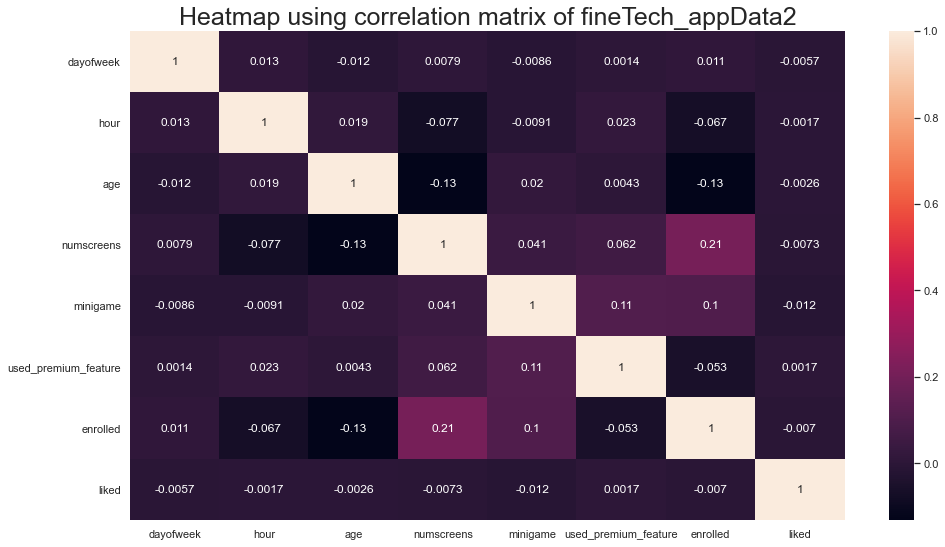

In [150]:
# Heatmap using Correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(fineTech_appData2.corr(), annot = True)
plt.title('Heatmap using correlation matrix of fineTech_appData2', fontsize=25)

# Pairplot of fineTech_appData2

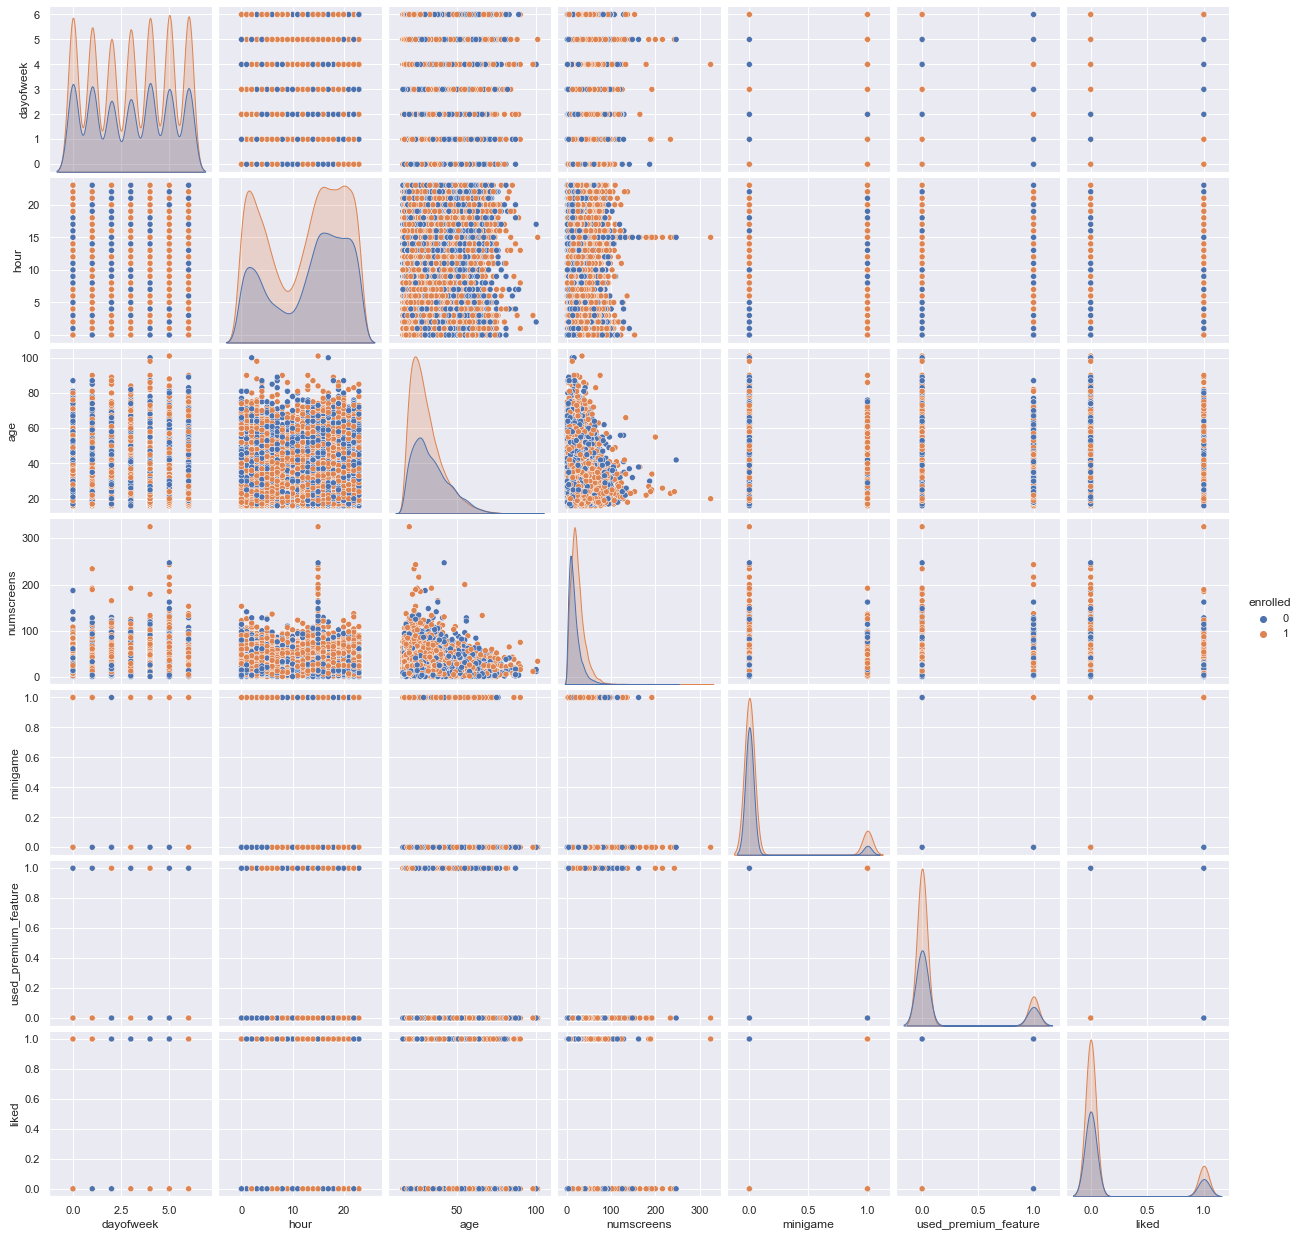

In [151]:
# Pairplot of fineTech_appData2 Dataset

#%matplotlib qt5 # for show graph in seperate window
sns.pairplot(fineTech_appData2, hue = 'enrolled')

# Countplot of enrolled

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

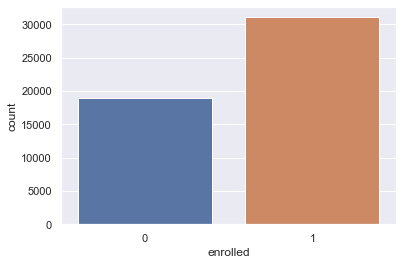

In [152]:
# Show counterplot of 'enrolled' feature
sns.countplot(fineTech_appData.enrolled)

In [153]:
# value enrolled and not enrolled customers
print('Not enrolled user =',(fineTech_appData.enrolled<1).sum(), 'out of 50000')
print('Enrolled user =', 50000-(fineTech_appData.enrolled<1).sum(), 'out of 50000')

Not enrolled user = 18926 out of 50000
Enrolled user = 31074 out of 50000


# Histogram of each feature of fineTech_appData2

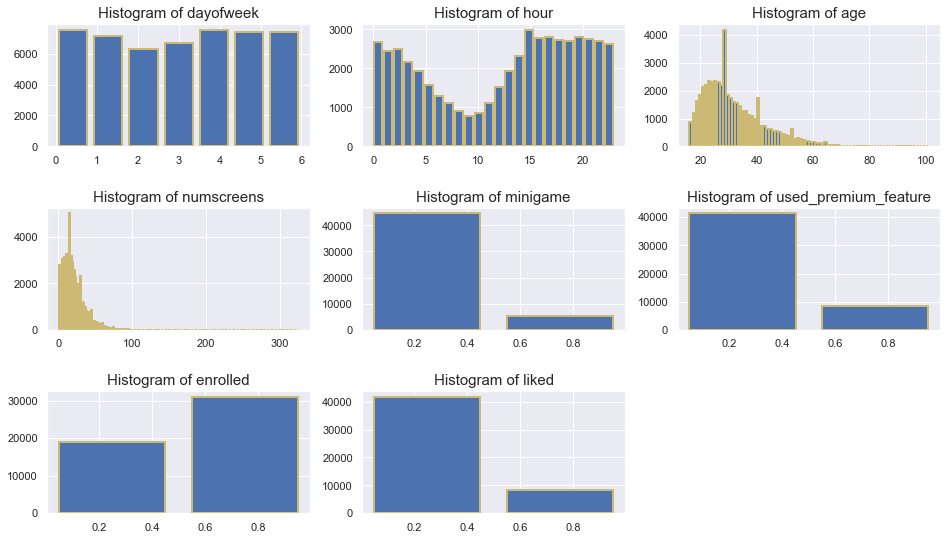

In [154]:
# plot histogram

plt.figure(figsize=(16,9))
features = fineTech_appData2.columns
for i, j in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title('Histogram of {}'.format(j), fontsize = 15)
    
    bins = len(fineTech_appData[j].unique())
    plt.hist(fineTech_appData2[j], bins = bins, rwidth=0.8, edgecolor = 'y', linewidth=2)
    
plt.subplots_adjust(hspace=0.5)

# Correlation barplot with 'enrolled' feature

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


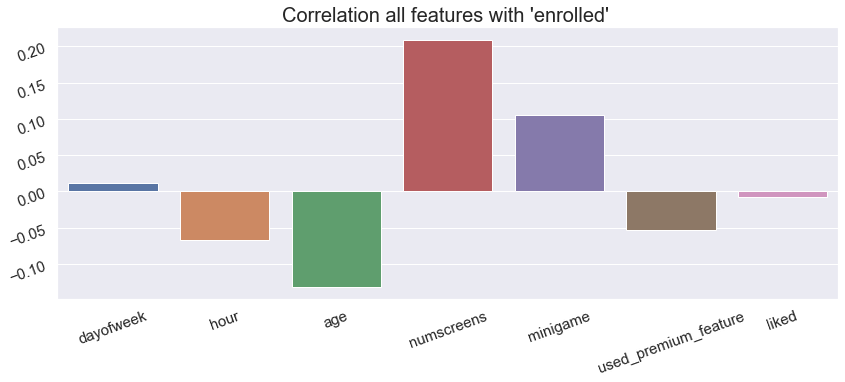

In [155]:
# show corelation barplot
sns.set() # set background dark grid
plt.figure(figsize=(14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize=20)
fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis=1)
ax = sns.barplot(fineTech_appData3.columns, fineTech_appData3.corrwith(fineTech_appData2.enrolled)) # plot barplot
ax.tick_params(labelsize=15, labelrotation = 20, color = 'k')

In [156]:
# parsing object date into format
fineTech_appData['first_open'] = [parser.parse(i) for i in fineTech_appData['first_open']]

In [157]:
fineTech_appData['enrolled_date'] = [parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]

In [158]:
fineTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [159]:
fineTech_appData['time_to_enrolled'] = (fineTech_appData.enrolled_date - fineTech_appData.first_open).astype('timedelta64[h]')

In [160]:
fineTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
time_to_enrolled               float64
dtype: object

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

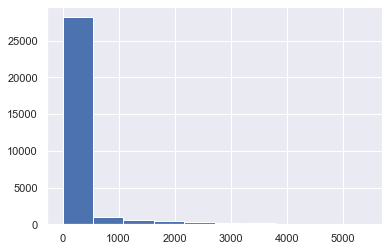

In [161]:
# plot histogram
plt.hist(fineTech_appData['time_to_enrolled'].dropna())

In [162]:
fineTech_appData.time_to_enrolled.isna().sum()

18926

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

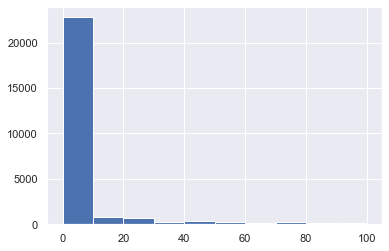

In [163]:
# customer mostly enrolled between 0-10 hrs
plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range = (0,100))

In [164]:
# Those customers have enrolled after 48 hrs set as 0
fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48, 'enrolled'] = 0

In [165]:
fineTech_appData

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0.0


In [166]:
fineTech_appData.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [167]:
fineTech_appData

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [168]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv('top_screens.csv').top_screens.values

In [169]:
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [170]:
type(fineTech_app_screen_Data)

numpy.ndarray

In [171]:
# Add ',' at the end of each string of 'screen_list' for further operation
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str)+','

In [172]:
fineTech_appData

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer,",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [173]:
# string into number
for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int) # here onverting str into int
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name + ',',"")   # replacing string into space (" ") 

In [174]:
# test
fineTech_appData.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [175]:
# test
fineTech_appData.screen_list.str.replace('Splash'+",","")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [176]:
# get shape
fineTech_appData.shape

(50000, 68)

In [177]:
# head of Dataframe
fineTech_appData.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
fineTech_appData.loc[0, 'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [179]:
fineTech_appData.screen_list.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [180]:
# count remain screen list and store counted number in 'remain_screen_list'
fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")

In [181]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [182]:
fineTech_appData

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,13


In [183]:
# total columns
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [184]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                 'Saving2',
                 'Saving2Amount',
                 'Saving4',
                 'Saving5',
                 'Saving6',
                 'Saving7',
                 'Saving8',
                 'Saving9',
                 'Saving10']
fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis=1)
fineTech_appData.drop(columns = saving_screens, inplace = True)

In [185]:
fineTech_appData

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,13,0


In [186]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard']
fineTech_appData['credit_screen_count'] = fineTech_appData[credit_screens].sum(axis=1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [187]:
fineTech_appData

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screen_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,7,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,5,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,6,0,3
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,1,0,0,0,0,0,0,6,0,2
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,13,0,0


In [188]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3']
fineTech_appData['cc_screen_count'] = fineTech_appData[cc_screens].sum(axis=1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [189]:
fineTech_appData

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screen_count,cc_screen_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,0,6,0,2,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,13,0,0,0


In [190]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4']
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis=1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [191]:
fineTech_appData

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screen_count,cc_screen_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0,1,...,0,0,0,0,0,13,0,0,0,0


In [192]:
fineTech_appData.shape

(50000, 50)

In [193]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [194]:
fineTech_appData.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screen_count,cc_screen_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


# Heatmap with correlation matrix of new fineTech_appData

<AxesSubplot:>

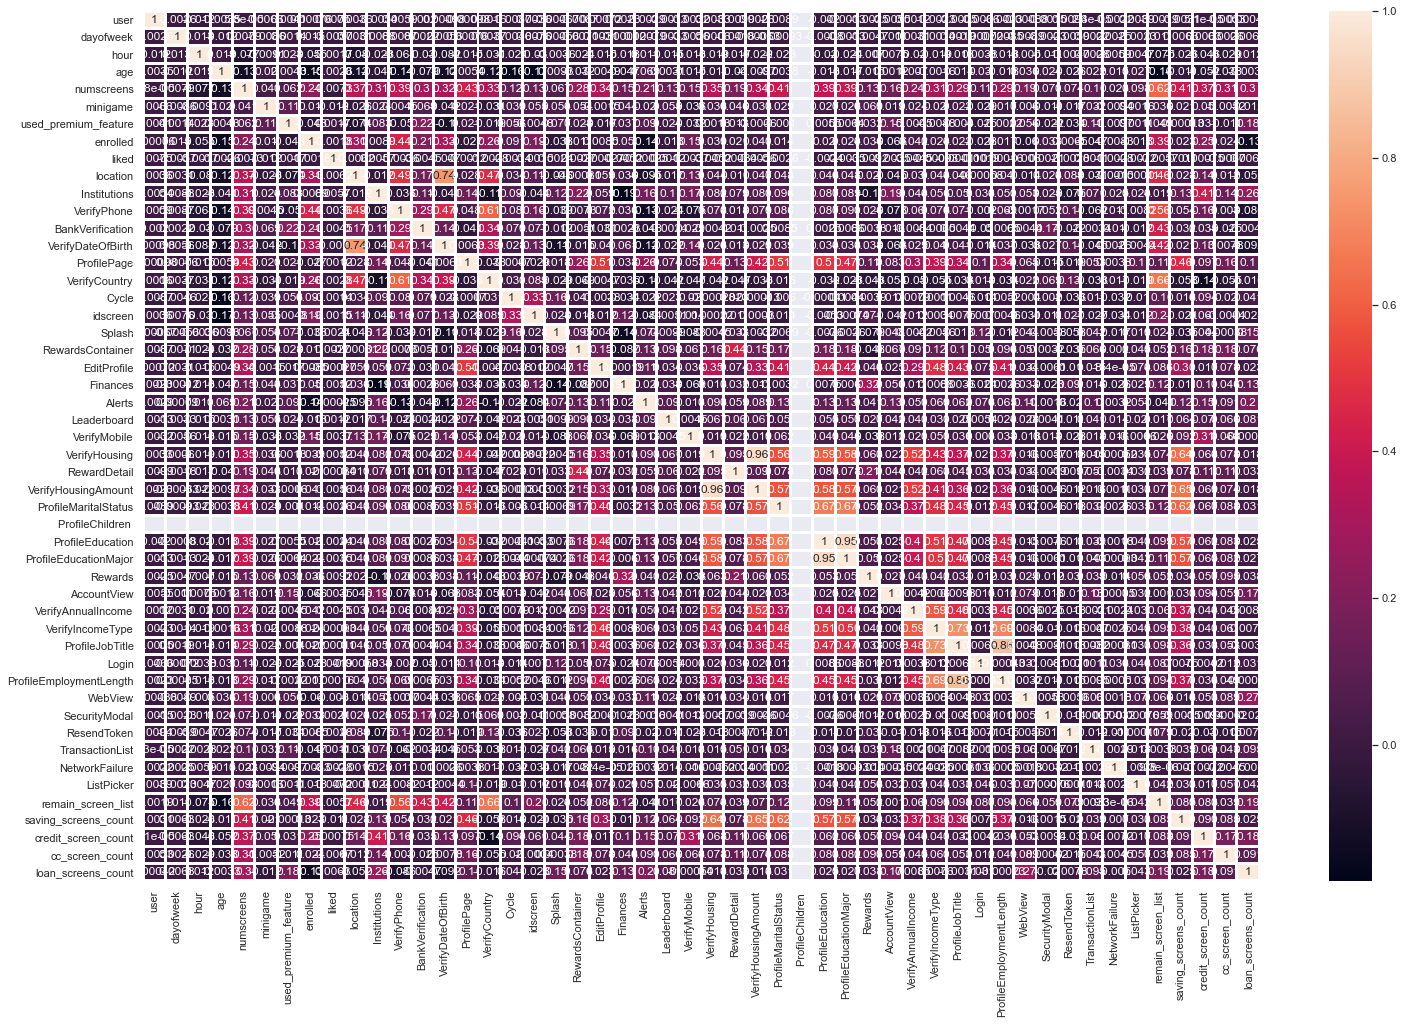

In [195]:
# Heatmap with correlation matrix of new fineTech_appData
plt.figure(figsize=(25,16))
sns.heatmap(fineTech_appData.corr(), annot=True, linewidth=2)

In [196]:
# above none of the relations are maximum correlated

In [197]:
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'remain_screen_list',
       'saving_screens_count', 'credit_screen_count', 'cc_screen_count',
       'loan_screens_count'],
      dtype='object')

In [200]:
fineTech_appData['ProfileChildren '].unique()

array([0])

In [202]:
corr_matrix = fineTech_appData.corr()
corr_matrix['ProfileChildren ']

user                      NaN
dayofweek                 NaN
hour                      NaN
age                       NaN
numscreens                NaN
minigame                  NaN
used_premium_feature      NaN
enrolled                  NaN
liked                     NaN
location                  NaN
Institutions              NaN
VerifyPhone               NaN
BankVerification          NaN
VerifyDateOfBirth         NaN
ProfilePage               NaN
VerifyCountry             NaN
Cycle                     NaN
idscreen                  NaN
Splash                    NaN
RewardsContainer          NaN
EditProfile               NaN
Finances                  NaN
Alerts                    NaN
Leaderboard               NaN
VerifyMobile              NaN
VerifyHousing             NaN
RewardDetail              NaN
VerifyHousingAmount       NaN
ProfileMaritalStatus      NaN
ProfileChildren           NaN
ProfileEducation          NaN
ProfileEducationMajor     NaN
Rewards                   NaN
AccountVie

In [203]:
fineTech_appData['ProfileChildren ']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: ProfileChildren , Length: 50000, dtype: int32

# Data Preprocessing

# Split dataset in Train and Test

In [204]:
clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled']
fineTech_appData.drop(columns = 'enrolled', inplace = True)

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData, target, test_size=0.2, random_state = 0)

In [208]:
print('Shape of X_train =', X_train.shape)
print('Shape of X_test =', X_test.shape)
print('Shape of y_train =', y_train.shape)
print('Shape of y_test =', y_test.shape)

Shape of X_train = (40000, 49)
Shape of X_test = (10000, 49)
Shape of y_train = (40000,)
Shape of y_test = (10000,)


In [209]:
# take User ID in another variable
train_userID = X_train['user']
X_train.drop(columns = 'user', inplace = True)
test_userID = X_test['user']
X_test.drop(columns = 'user', inplace = True)

In [210]:
print('Shape of X_train =', X_train.shape)
print('Shape of X_test =', X_test.shape)
print('Shape of y_train =', y_train.shape)
print('Shape of y_test =', y_test.shape)

Shape of X_train = (40000, 48)
Shape of X_test = (10000, 48)
Shape of y_train = (40000,)
Shape of y_test = (10000,)


# Feature Scaling

In [211]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) # fit only train data and applied to features
X_test_sc = sc.transform(X_test) # tranform only in features

# Model Building

In [212]:
# import required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Decision Tree

In [214]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_score(y_test, y_pred_dt)

0.6936

In [216]:
# train with Standard Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_dt_sc)

0.6932

# K-NN

In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_score(y_test, y_pred_knn)

0.6978

In [220]:
# train with Standard Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn_sc)

0.7314

# Naive Bayes

In [221]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_score(y_test, y_pred_nb)

0.7114

In [222]:
# train with Standard Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_nb_sc)

0.7114

# Random Forest

In [227]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.7621

In [229]:
# train with Standard Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)

0.7616

# Logistic Regression

In [234]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_score(y_test, y_pred_lr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7683

In [238]:
# train with Standard Scaling dataset
lr_model2 = LogisticRegression(random_state=0)
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_lr_sc)

0.768

# Support Vector Machine

In [240]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy_score(y_test, y_pred_svc)

0.7609

In [241]:
# train with Standard Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_svc_sc)

0.7789

# XGBoost

In [245]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [246]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred_xgb)

0.7838

In [247]:
# train with Standard Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc)

0.7838

In [248]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
learning_rate = 0.01,
n_estimators = 5000,
max_depth = 4,
min_child_weight = 6,
gamma = 0,
subsample = 0.8,
colsample_bytree = 0.8,
reg_alpha = 0.005,
objective = 'binary:logistic',
nthread = 4,
scale_pos_weight = 1,
seed = 27)

xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)

accuracy_score(y_test, y_pred_xgb_pt1)

0.7881

In [253]:
# XGB classifier with parameter tuning
# train with Standard Scaling dataset
xgb_model_pt2 = XGBClassifier(
learning_rate = 0.01,
n_estimators = 5000,
max_depth = 4,
min_child_weight = 6,
gamma = 0,
subsample = 0.8,
colsample_bytree = 0.8,
reg_alpha = 0.005,
objective = 'binary:logistic',
nthread = 4,
scale_pos_weight = 1,
seed = 27)

xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7881

Text(0.5, 1.0, 'Confusion Matrix')

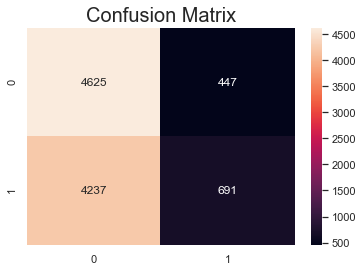

In [252]:
# confusion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title('Confusion Matrix', fontsize = 20)

In [254]:
# Classification Report 
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)

print('Classification report >>> \n', cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [256]:
# Cross validation -> to check model is generalize or overfit or underfit
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print('Cross validation of XGBoost model = ', cross_validation)
print('Cross validation of XGBoost model(in mean) = ', cross_validation.mean())

Cross validation of XGBoost model =  [0.7925  0.7765  0.788   0.78525 0.77975 0.78825 0.7895  0.78125 0.7895
 0.777  ]
Cross validation of XGBoost model(in mean) =  0.7847500000000001


In [257]:
# XGBoost gave the higest accuracy and its the best classifier for this dataset

# Mapping predicted output to the target

In [259]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['prediction result'] = y_pred_xgb_sc_pt2

final_result

,user,enrolled,prediction result
11841,239786,1,1
19602,279644,1,1
45519,98290,0,0
25747,170150,1,1
42642,237568,1,0
...,...,...,...
25091,143036,1,1
27853,91158,1,1
47278,248318,0,0
37020,142418,1,1


# Save the Model

In [260]:
## Pickle
import pickle

# save model
pickle.dump(xgb_model_pt2, open('FineTech_app_ML_model.pickle', 'wb'))

#load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))

# pred the output
y_pred_pl = ml_model_pl.predict(X_test_sc)

# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confusion matrix = \n', cm_pl)

# show the accuracy
print('Accuracy of model =', accuracy_score(y_test, y_pred_pl))

Confusion matrix = 
 [[4156  916]
 [1203 3725]]
Accuracy of model = 0.7881


In [262]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [268]:
## Joblib
import joblib

# save model
joblib.dump(xgb_model_pt2, 'FineTech_app_ML_model.joblib')

# Load model
ml_model_jl = joblib.load('FineTech_app_ML_model.joblib')

# predict the output
y_pred_jl = ml_model_jl.predict(X_test_sc)

cm_jl = confusion_matrix(y_test, y_pred_jl)
print('Confusion matrix = \n', cm_jl)

print('Accuracy of model = ', accuracy_score(y_test, y_pred_jl))

Confusion matrix = 
 [[4156  916]
 [1203 3725]]
Accuracy of model =  0.7881
